In [11]:
import pandas as pd
df = pd.read_csv('ranknet_mode_result_1225.csv')
# add users' gender information into final prediction's data
df['Predicted_Accurate'] = df['True Label']==df['Predicted Saved']

In [12]:
import matplotlib.pyplot as plt
grouped_accuracy = df.groupby('Review_gender')['Predicted_Accurate'].value_counts(normalize=False).unstack(fill_value=0)
grouped_accuracy_ratio = df.groupby('Review_gender')['Predicted_Accurate'].value_counts(normalize=True).unstack(fill_value=0)

print("\nCorrect/Incorrect Counts by Gender:\n", grouped_accuracy)
print("\nCorrect/Incorrect Ratios by Gender:\n", grouped_accuracy_ratio)


Correct/Incorrect Counts by Gender:
 Predicted_Accurate   False    True 
Review_gender                      
female              138488   387882
male                348486  1008338

Correct/Incorrect Ratios by Gender:
 Predicted_Accurate    False    True 
Review_gender                       
female              0.26310  0.73690
male                0.25684  0.74316


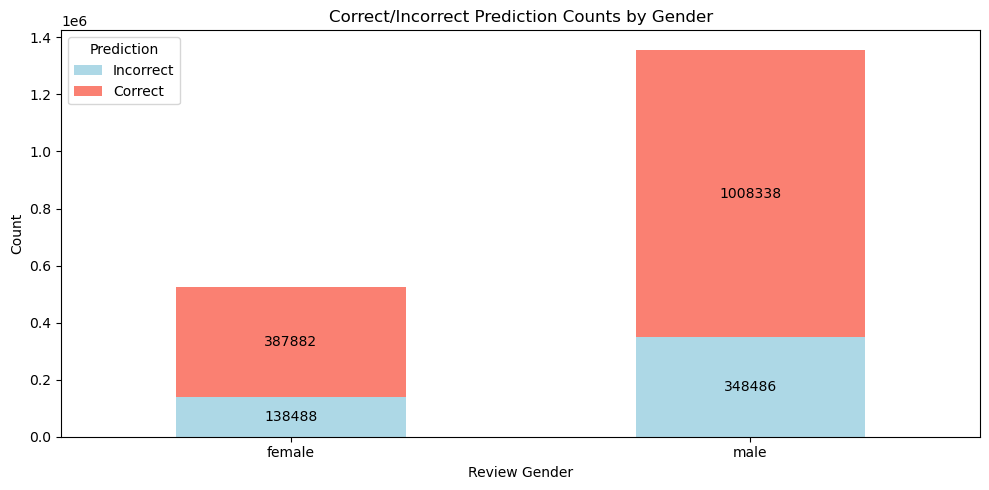

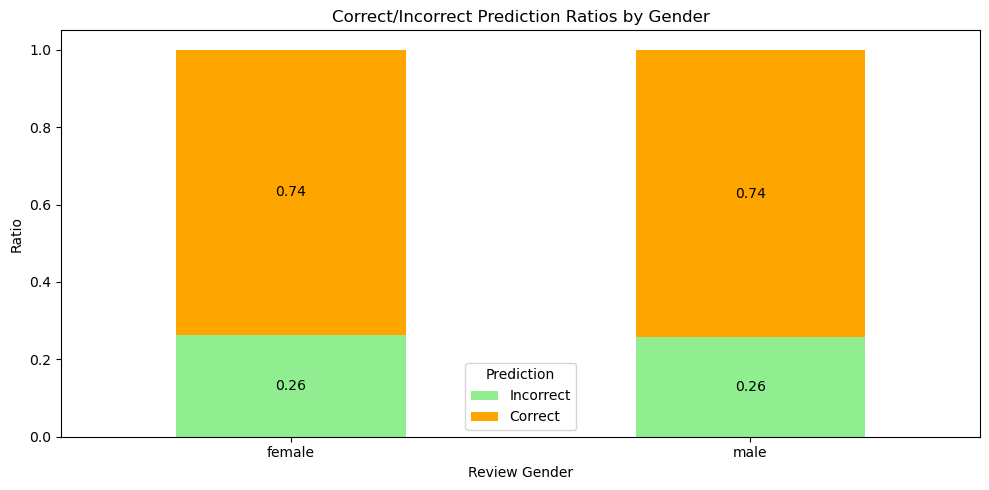

In [13]:
import matplotlib.pyplot as plt

# Plot Correct/Incorrect Prediction Counts by Gender
plt.figure(figsize=(10, 5))
ax1 = grouped_accuracy.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], ax=plt.gca())
plt.xlabel('Review Gender')
plt.ylabel('Count')
plt.title('Correct/Incorrect Prediction Counts by Gender')
plt.xticks(rotation=0)
plt.legend(['Incorrect', 'Correct'], title='Prediction')

# Add values on top of bars
for container in ax1.containers:
    ax1.bar_label(container, label_type='center', fmt='%.0f')

plt.tight_layout()
plt.show()

# Plot Correct/Incorrect Ratios by Gender
plt.figure(figsize=(10, 5))
ax2 = grouped_accuracy_ratio.plot(kind='bar', stacked=True, color=['lightgreen', 'orange'], ax=plt.gca())
plt.xlabel('Review Gender')
plt.ylabel('Ratio')
plt.title('Correct/Incorrect Prediction Ratios by Gender')
plt.xticks(rotation=0)
plt.legend(['Incorrect', 'Correct'], title='Prediction')

# Add values on top of bars
for container in ax2.containers:
    ax2.bar_label(container, label_type='center', fmt='%.2f')

plt.tight_layout()
plt.show()


In [14]:
# t-test to check if there's bias among male and female group
from scipy.stats import norm, ttest_ind
df['diff'] = abs(df['Predicted Probability']-df['True Label'])
diff_male = df[df['Review_gender'] == 'male']['diff']
diff_female = df[df['Review_gender'] == 'female']['diff']

t_stat, p_value = ttest_ind(diff_male, diff_female, equal_var=False)
print(f"\nT-test for gender difference in 'diff':\nT-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("There is a statistically significant difference between male and female diff values.")
else:
    print("There is no statistically significant difference between male and female diff values.")

male_predictions_df = df[df['Review_gender']=='male']
female_predictions_df = df[df['Review_gender']=='female']


T-test for gender difference in 'diff':
T-statistic: -18.7137, P-value: 0.0000
There is a statistically significant difference between male and female diff values.


In [17]:
from scipy.stats import kstest

# nomarlity test

result_male = kstest(diff_male, 'norm')
result_female = kstest(diff_female, 'norm')

print(f"Male: statistic={result_male.statistic:.4f}, pvalue={result_male.pvalue:.4f}")
print(f"Female: statistic={result_female.statistic:.4f}, pvalue={result_female.pvalue:.4f}")  


Male: statistic=0.5199, pvalue=0.0000
Female: statistic=0.5200, pvalue=0.0000


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


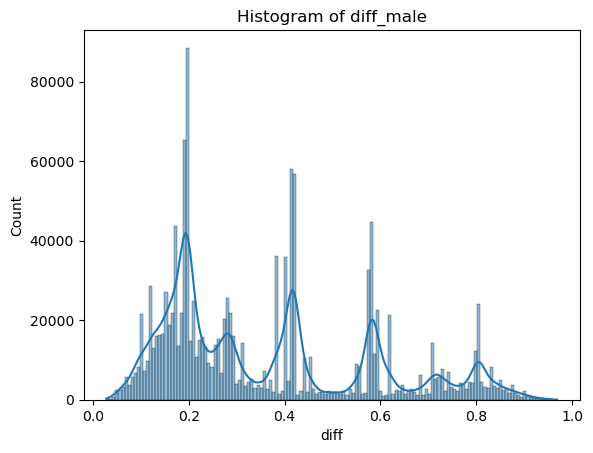

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


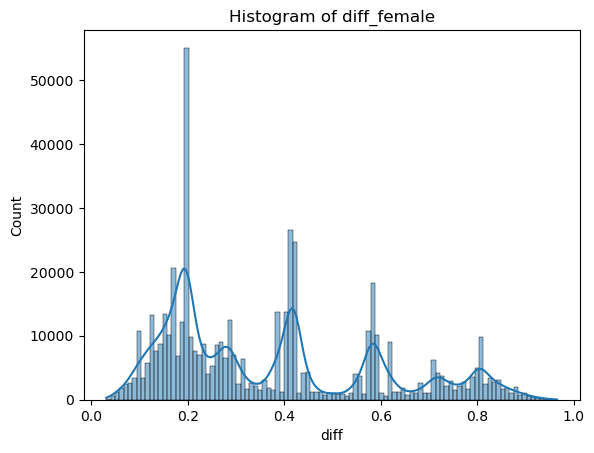

In [6]:
import seaborn as sns

sns.histplot(diff_male, kde=True)
plt.title("Histogram of diff_male")
plt.show()

sns.histplot(diff_female, kde=True)
plt.title("Histogram of diff_female")
plt.show()


In [7]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(diff_male, diff_female, alternative='two-sided')
print(f"Mann-Whitney U test: U={u_stat}, p={p_value}")


Mann-Whitney U test: U=351365951283.0, p=1.1147522741487055e-65


In [8]:
print(diff_male.median())
print(diff_female.median())


0.2889928519725799
0.292942076921463


/var/folders/x5/b6qvk1zx3dg9d_8_8zt4hf3m0000gn/T/ipykernel_37164/229438021.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diff_male, label='Male', shade=True)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/x5/b6qvk1zx3dg9d_8_8zt4hf3m0000gn/T/ipykernel_37164/229438021.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diff_female, label='Female', shade=True)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

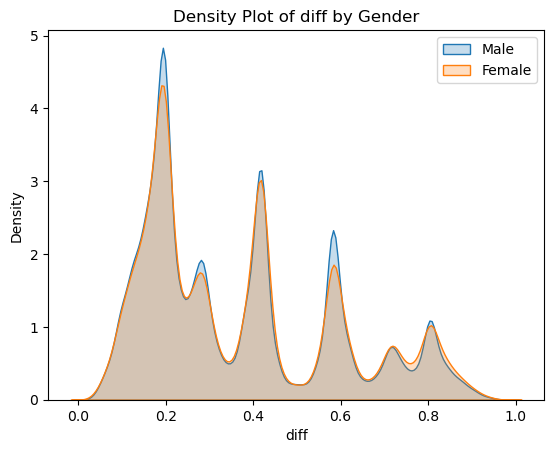

In [9]:
import seaborn as sns
sns.kdeplot(diff_male, label='Male', shade=True)
sns.kdeplot(diff_female, label='Female', shade=True)
plt.legend()
plt.title("Density Plot of diff by Gender")
plt.show()


In [10]:
import numpy as np

mean_diff = np.mean(diff_male) - np.mean(diff_female)
pooled_std = np.sqrt((np.var(diff_male, ddof=1) + np.var(diff_female, ddof=1)) / 2)
cohens_d = mean_diff / pooled_std
print(f"Cohen's d: {cohens_d}")


Cohen's d: -0.030504020785976124
